**INSTALLING YFINANCE LIBRARY**



In [1]:
!pip install yfinance

**IMPORTING LIBRARIES**

In [126]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta

**DOWNLOADING DATA**

In [127]:
data = yf.download('AMZN', start='2010-01-01', end=datetime.today().strftime('%Y-%m-%d'))

[*********************100%%**********************]  1 of 1 completed


In [128]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
2024-06-27,195.009995,199.839996,194.199997,197.850006,197.850006,74397500
2024-06-28,197.729996,198.850006,192.500000,193.250000,193.250000,76930200
2024-07-01,193.490005,198.300003,192.820007,197.199997,197.199997,41192000


In [134]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000,2010-01-04,2010,1,4,0
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000,2010-01-05,2010,1,5,1
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000,2010-01-06,2010,1,6,2
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000,2010-01-07,2010,1,7,3
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000,2010-01-08,2010,1,8,4


**CHECKING AND DROPPING NULL AND ZERO VALUES**

In [135]:
print(data.isnull().sum())
data.dropna(inplace=True)
print((data == 0).sum())
data = data[(data != 0).all(axis=1)]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
Year         0
Month        0
Day          0
DayOfWeek    0
dtype: int64
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Date           0
Year           0
Month          0
Day            0
DayOfWeek    680
dtype: int64


In [136]:
data['Date'] = data.index
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

In [137]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000,2010-01-05,2010,1,5,1
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000,2010-01-06,2010,1,6,2
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000,2010-01-07,2010,1,7,3
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000,2010-01-08,2010,1,8,4
2010-01-12,6.4495,6.4910,6.3275,6.3675,6.3675,181926000,2010-01-12,2010,1,12,1
2010-01-13,6.3950,6.4855,6.2875,6.4555,6.4555,214464000,2010-01-13,2010,1,13,2
2010-01-14,6.4570,6.5190,6.3200,6.3675,6.3675,195498000,2010-01-14,2010,1,14,3
2010-01-15,6.4590,6.4825,6.3530,6.3570,6.3570,307530000,2010-01-15,2010,1,15,4
2010-01-19,6.3155,6.4000,6.2165,6.3805,6.3805,177852000,2010-01-19,2010,1,19,1


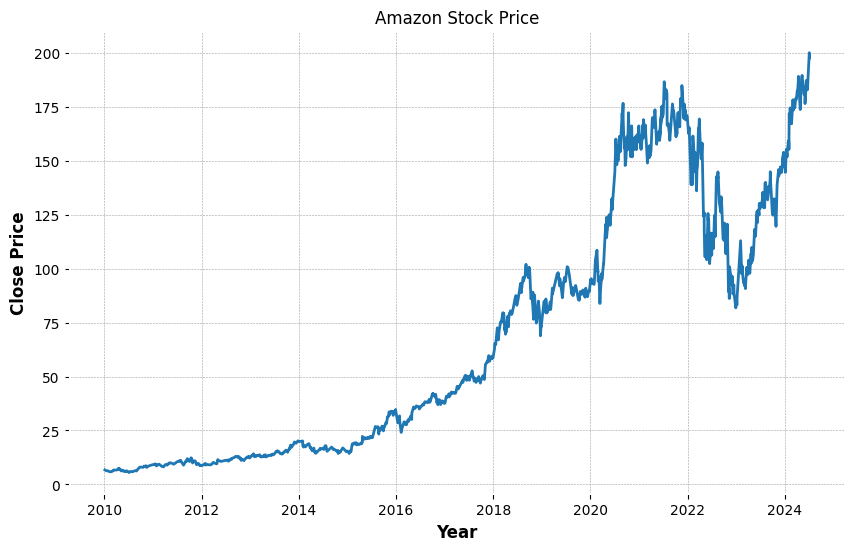

In [138]:
plt.figure(figsize=(10,6))
plt.title('Amazon Stock Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(data['Close'])
plt.show()

In [139]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day,DayOfWeek
count,2969.000000,2969.000000,2969.000000,2969.000000,2969.000000,2.969000e+03,2969,2969.000000,2969.000000,2969.000000,2969.000000
mean,67.322958,68.081936,66.487377,67.295005,67.295005,8.543644e+07,2017-04-03 19:16:45.186931712,2016.766251,6.406871,15.720445,2.489054
min,5.296500,5.564500,5.290000,5.430500,5.430500,1.762600e+07,2010-01-05 00:00:00,2010.000000,1.000000,1.000000,1.000000
25%,14.681500,14.820000,14.488000,14.698500,14.698500,5.372000e+07,2013-08-16 00:00:00,2013.000000,3.000000,8.000000,1.000000
50%,44.572498,44.748501,44.224499,44.327000,44.327000,7.175800e+07,2017-04-04 00:00:00,2017.000000,6.000000,16.000000,2.000000
75%,108.653503,112.639999,107.099998,109.559998,109.559998,9.950000e+07,2020-11-19 00:00:00,2020.000000,9.000000,23.000000,3.000000
max,199.940002,200.429993,196.759995,200.000000,200.000000,8.484220e+08,2024-07-03 00:00:00,2024.000000,12.000000,31.000000,4.000000
std,57.708811,58.361223,56.982086,57.665132,57.665132,5.272547e+07,NaN,4.196399,3.432959,8.760323,1.117415


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2969 entries, 2010-01-05 to 2024-07-03
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       2969 non-null   float64       
 1   High       2969 non-null   float64       
 2   Low        2969 non-null   float64       
 3   Close      2969 non-null   float64       
 4   Adj Close  2969 non-null   float64       
 5   Volume     2969 non-null   int64         
 6   Date       2969 non-null   datetime64[ns]
 7   Year       2969 non-null   int32         
 8   Month      2969 non-null   int32         
 9   Day        2969 non-null   int32         
 10  DayOfWeek  2969 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(4), int64(1)
memory usage: 232.0 KB


**SPECIFYING FEATURES/INDEPENDENT AND DEPENDENT VARIABLES**

In [141]:
X = data[['Year', 'Month', 'Day', 'DayOfWeek', 'Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SCALING THE DATA**

In [143]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

**SELECTING AND TRAINING THE MODEL**

In [144]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [145]:
y_pred = model.predict(X_test)
y_pred

array([171.0557854 ,  33.10500655, 163.97012885,   9.81957264,
        42.41129594,  96.3031118 ,  10.099233  ,   8.75814144,
       176.63995298,   9.14528942,  10.09612061,  38.63466471,
         8.31571415, 172.71545708,   6.29712585, 151.00630668,
        99.26795886,  48.44719311,  89.27605111,   7.22897574,
        19.2397573 , 156.39837491,  78.64841049,  37.16578085,
       124.84698481,  21.30508212,  35.87048191,   7.12817872,
        14.2150803 ,  18.15456575,  26.87075283, 119.54839045,
       197.42490312,  26.30203203,  97.60432277,  11.18195859,
        29.12579215,  38.21728039, 176.94796509, 130.69690505,
       108.90300857,  17.61089918, 162.99725225,  80.61313207,
        99.54399485,  95.60498704, 173.83552285, 129.48981173,
         9.06038691, 164.59253451, 158.29942077,  14.51524915,
        80.02263794, 159.96910578,  27.98784553,  40.88496121,
         6.73849434,  48.93691364,  12.96345299,  96.08970462,
        93.74730163, 134.72193755,   6.3938448 ,  18.14

In [146]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error:", mse)
print(f"Mean Absolute Error:", mae)
print(f"Root Mean Squared Error :", rmse)

Mean Squared Error: 0.3994734491990916
Mean Absolute Error: 0.3525994284896533
Root Mean Squared Error : 0.6320391199910743


**DATA VISUALIZATION**

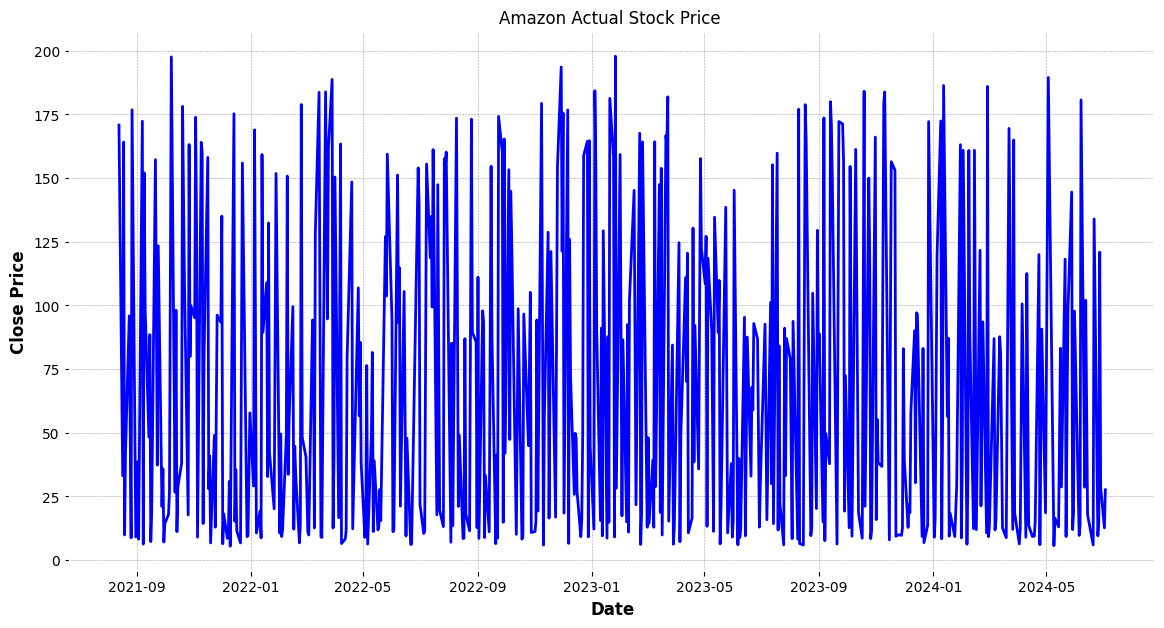

In [149]:
plt.figure(figsize=(14,7))
plt.plot(data.index[len(data)-len(y_test):],y_test , color = 'blue')
plt.title('Amazon Actual Stock Price ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

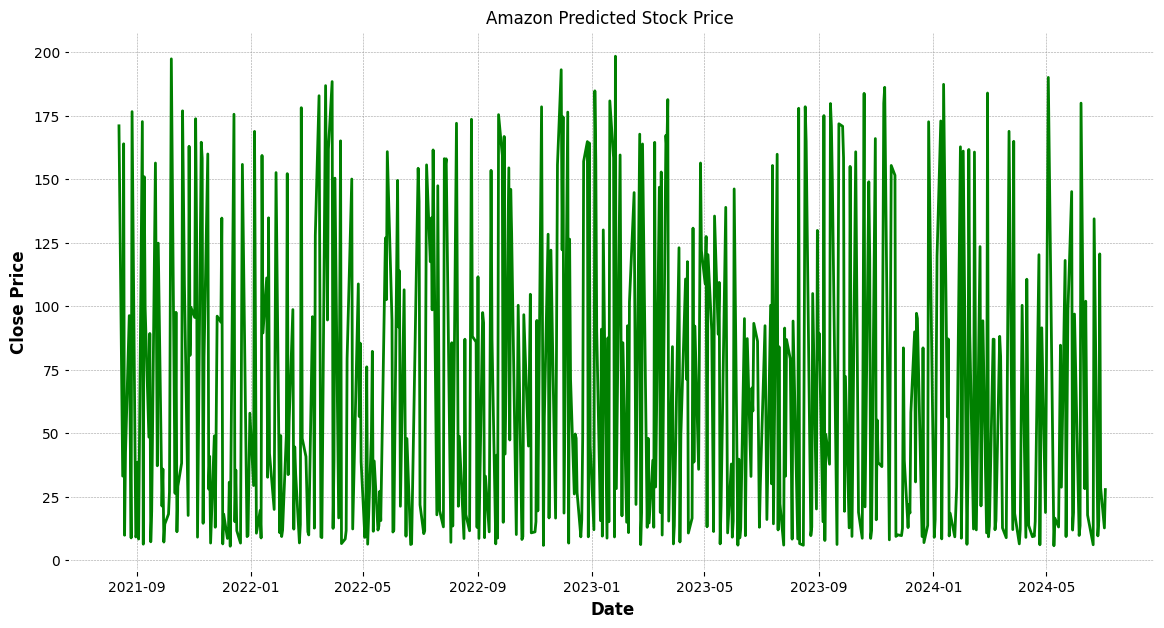

In [150]:
plt.figure(figsize=(14,7))
plt.plot(data.index[len(data)-len(y_test):],y_pred, color='green')
plt.title('Amazon Predicted Stock Price ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

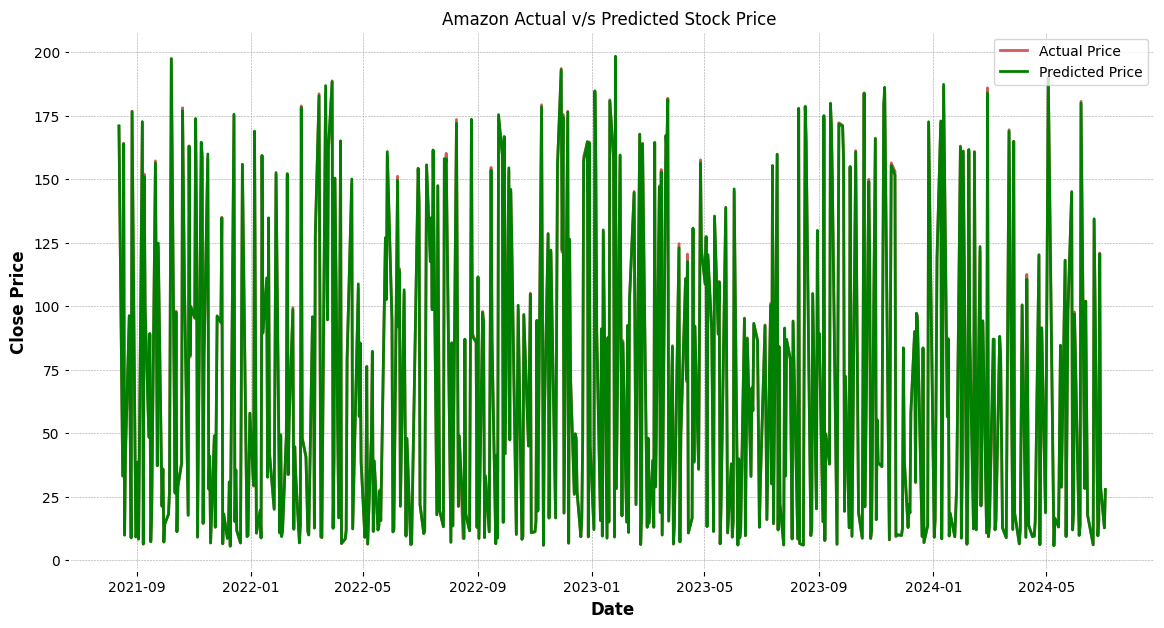

In [151]:
plt.figure(figsize=(14,7))
plt.plot(data.index[len(data)-len(y_test):] , y_test , color = 'indianred' , label='Actual Price')
plt.plot(data.index[len(data)-len(y_test):] , y_pred, color='green' , label='Predicted Price')
plt.title('Amazon Actual v/s Predicted Stock Price ')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [153]:
future_dates = pd.date_range(start=data.index[-1], periods=30, freq='D')
future_df = pd.DataFrame(future_dates, columns=['Date'])
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['Open'] = data['Open'].iloc[-1]
future_df['High'] = data['High'].iloc[-1]
future_df['Low'] = data['Low'].iloc[-1]
future_df['Volume'] = data['Volume'].iloc[-1]
future_df

,Date,Year,Month,Day,DayOfWeek,Open,High,Low,Volume
0,2024-07-03,2024,7,3,2,199.940002,200.029999,196.759995,31597900
1,2024-07-04,2024,7,4,3,199.940002,200.029999,196.759995,31597900
2,2024-07-05,2024,7,5,4,199.940002,200.029999,196.759995,31597900
3,2024-07-06,2024,7,6,5,199.940002,200.029999,196.759995,31597900
4,2024-07-07,2024,7,7,6,199.940002,200.029999,196.759995,31597900
5,2024-07-08,2024,7,8,0,199.940002,200.029999,196.759995,31597900
6,2024-07-09,2024,7,9,1,199.940002,200.029999,196.759995,31597900
7,2024-07-10,2024,7,10,2,199.940002,200.029999,196.759995,31597900
8,2024-07-11,2024,7,11,3,199.940002,200.029999,196.759995,31597900
9,2024-07-12,2024,7,12,4,199.940002,200.029999,196.759995,31597900


In [154]:
future_predictions = model.predict(st_x.transform(future_df[['Year', 'Month', 'Day', 'DayOfWeek', 'Open', 'High', 'Low', 'Volume']]))
future_predictions

array([197.42490312, 197.42128472, 197.41766632, 197.41404792,
       197.41042952, 197.41972035, 197.41610195, 197.41248355,
       197.40886515, 197.40524675, 197.40162836, 197.39800996,
       197.40730078, 197.40368239, 197.40006399, 197.39644559,
       197.39282719, 197.38920879, 197.38559039, 197.39488122,
       197.39126282, 197.38764442, 197.38402602, 197.38040762,
       197.37678923, 197.37317083, 197.38246166, 197.37884326,
       197.37522486, 197.42715288])

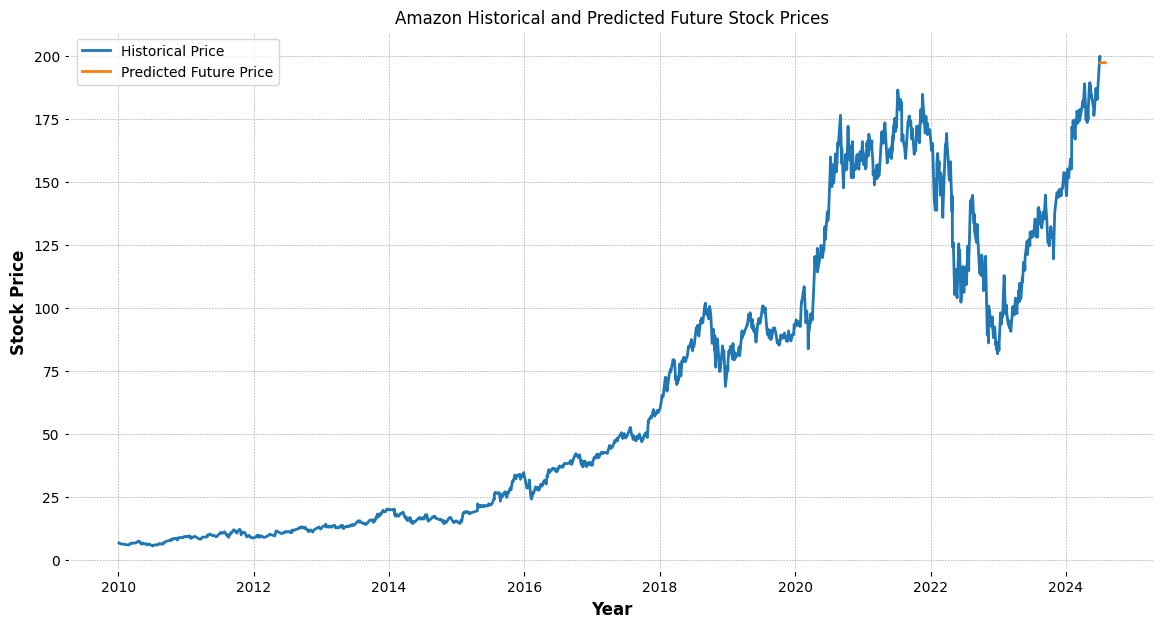

In [156]:
plt.figure(figsize=(14, 7))
plt.plot(data.index , data['Close'], label='Historical Price')
plt.plot(future_dates, future_predictions, label='Predicted Future Price')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Amazon Historical and Predicted Future Stock Prices')
plt.legend()
plt.show()

In [95]:
!pip install mplfinance

In [157]:
import mplfinance as mpf

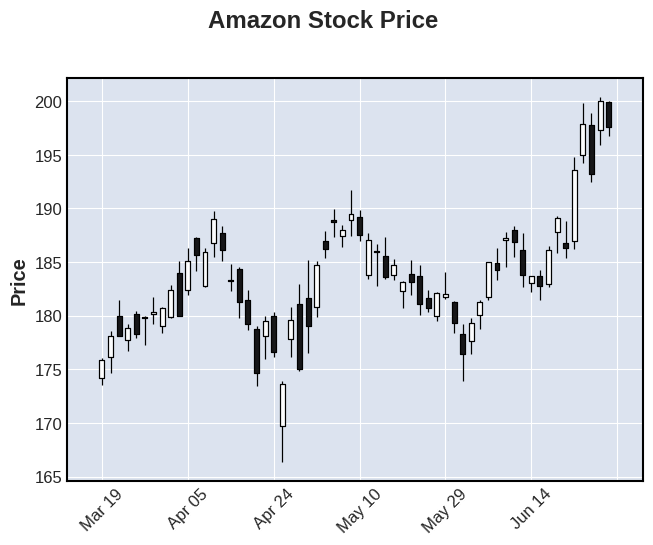

In [158]:
data_for_chart = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data_for_chart = data_for_chart[-60:]
data_for_chart.index.name = 'Date'

mpf.plot(data_for_chart, type='candle', title='Amazon Stock Price', ylabel='Price')

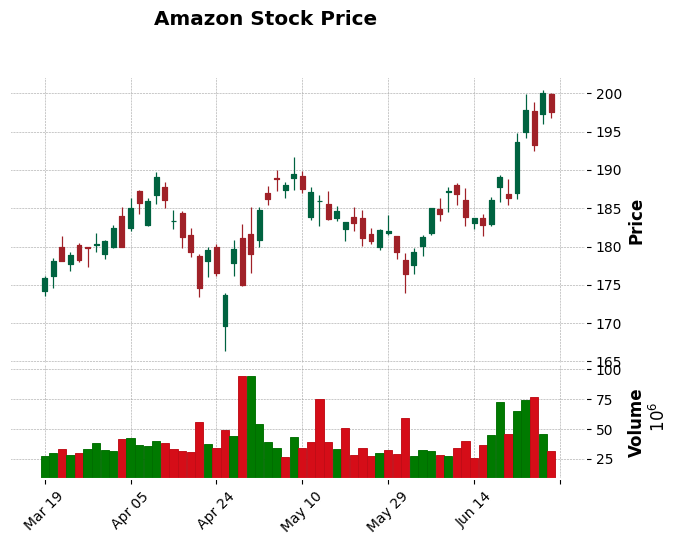

In [159]:
mpf.plot(data_for_chart, type='candle', style='charles', title='Amazon Stock Price', ylabel='Price', ylabel_lower='Volume', volume=True)

In [160]:
future_df_chart = pd.DataFrame({'Open': future_predictions, 'High': future_predictions, 'Low': future_predictions, 'Close': future_predictions}, index=future_dates)
future_df_chart

,Open,High,Low,Close
2024-07-03,197.424903,197.424903,197.424903,197.424903
2024-07-04,197.421285,197.421285,197.421285,197.421285
2024-07-05,197.417666,197.417666,197.417666,197.417666
2024-07-06,197.414048,197.414048,197.414048,197.414048
2024-07-07,197.410430,197.410430,197.410430,197.410430
2024-07-08,197.419720,197.419720,197.419720,197.419720
2024-07-09,197.416102,197.416102,197.416102,197.416102
2024-07-10,197.412484,197.412484,197.412484,197.412484
2024-07-11,197.408865,197.408865,197.408865,197.408865
2024-07-12,197.405247,197.405247,197.405247,197.405247


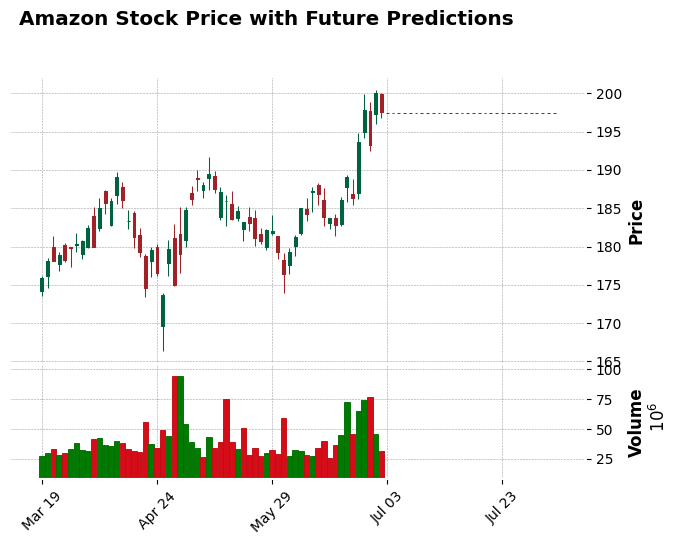

In [161]:
mpf.plot(pd.concat([data_for_chart, future_df_chart]), type='candle', style='charles', title='Amazon Stock Price with Future Predictions', ylabel='Price', ylabel_lower='Volume', volume=True)